# First Model - kNN (iris)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [3]:
# Load the Data
iris = load_iris()
# iris_data,iris_target = load_iris(return_X_y=True)

In [4]:
for key in iris.keys():
    print(f'Key:{key}')

Key:data
Key:target
Key:frame
Key:target_names
Key:DESCR
Key:feature_names
Key:filename
Key:data_module


In [5]:
# Convert BUNCH to Dataframe
iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Add the target variable
iris_df["target"] = iris['target']

##### !NOTE - Setting Random State allows to get same result everytime the function is run. 

In [27]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Split Data in train and test
iris_train,iris_test = train_test_split(iris_df,test_size=0.25,random_state=0)

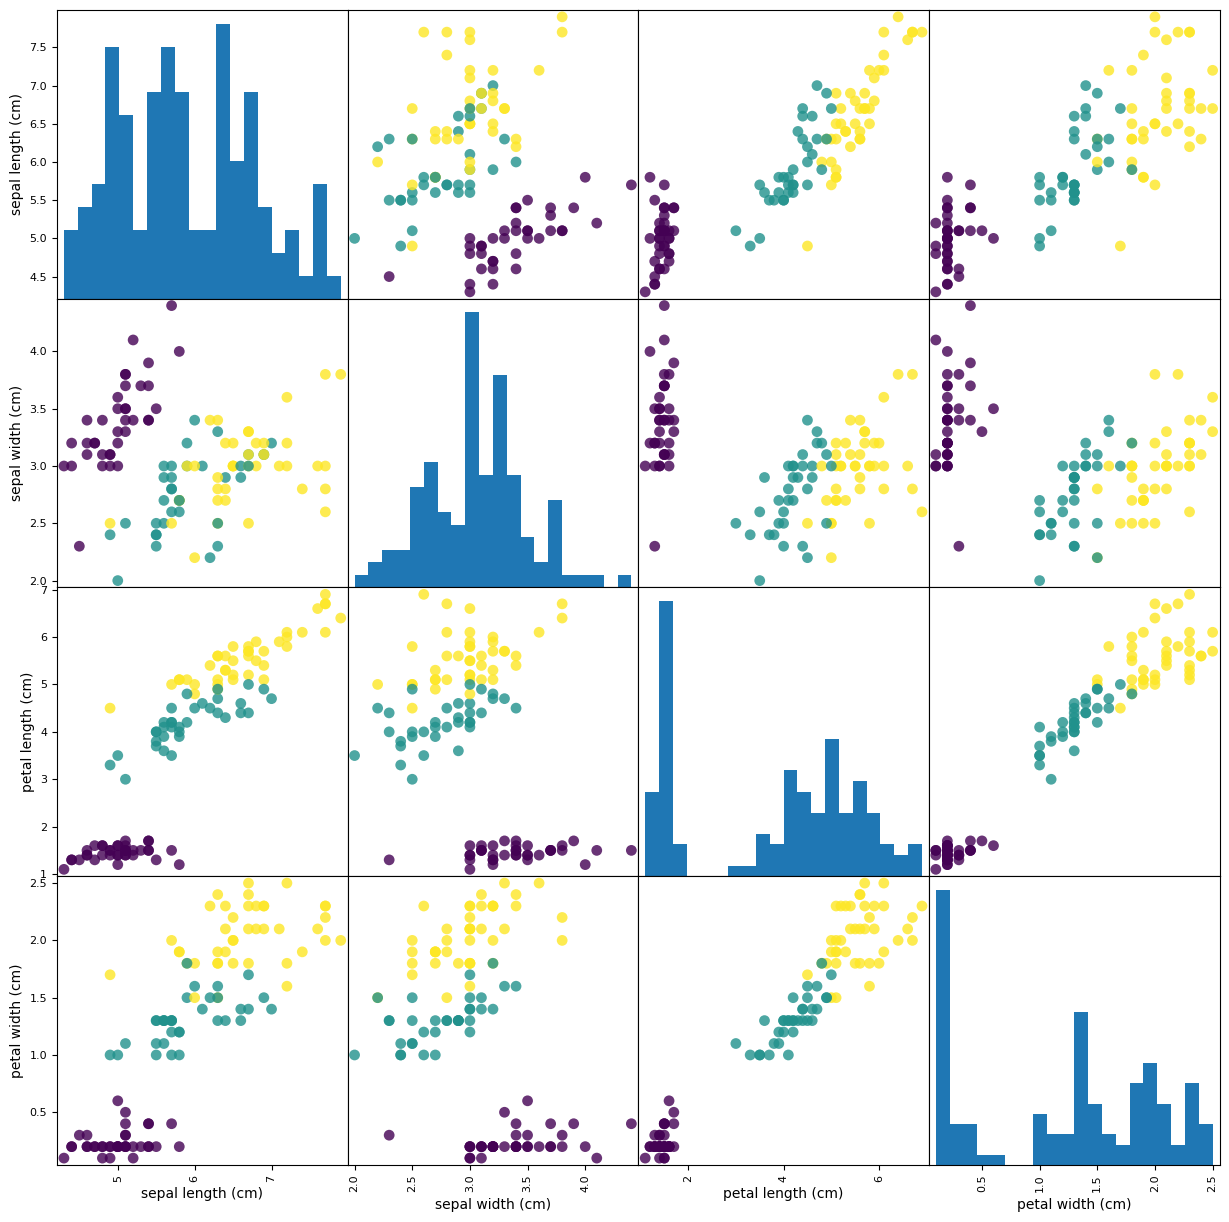

In [9]:
grr = pd.plotting.scatter_matrix(iris_train.iloc[:,:4], c=iris_train['target'], figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(iris_train.iloc[:,:4],iris_train['target'])

KNeighborsClassifier(n_neighbors=1)

In [12]:
iris_test['predicted'] = knn.predict(iris_test.iloc[:,:4])

c:\Users\shreyankj\Desktop\ML Learning\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
np.mean(iris_test['predicted']==iris_test['target'])

0.9736842105263158

In [14]:
knn.score(iris_test.iloc[:,:4],iris_test['target'])

c:\Users\shreyankj\Desktop\ML Learning\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

# Practice kNN - penguins (an alternative to iris)

In [15]:
# Load the Data
pen_raw = pd.read_csv(r"datasets/penguins.csv")
pen_raw

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [16]:
pen_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [17]:
unnecessary_cols = [0,1,5,6,7,8,14,15,16]

In [18]:
cols = [2,3,4,9,10,11,12,13]
pen = pen_raw.iloc[:,cols]
pen

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,50.8,19.0,210.0,4100.0,MALE


In [19]:
pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Sex                  333 non-null    object 
dtypes: float64(4), object(4)
memory usage: 21.6+ KB


In [20]:
# Sex is missing fill with unknown
pen[pen.iloc[:,7].isna()]

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [21]:
pen.iloc[:,7].fillna("Unknown",inplace=True)

In [28]:
pen["Species"].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [23]:
# Numerical attributes missing fill with mean
pen['body_mass(g)'] = pen.groupby(pen.columns[0])["Body Mass (g)"].transform(lambda group:group.fillna(np.mean(group)))
pen['culmen_len(mm)'] = pen.groupby(pen.columns[0])["Culmen Length (mm)"].transform(lambda group:group.fillna(np.mean(group)))
pen['culmen_dep(mm)'] = pen.groupby(pen.columns[0])["Culmen Depth (mm)"].transform(lambda group:group.fillna(np.mean(group)))
pen['flipper_len(mm)'] = pen.groupby(pen.columns[0])["Flipper Length (mm)"].transform(lambda group:group.fillna(np.mean(group)))
pen.drop(columns=["Body Mass (g)","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"],inplace=True)
pen

KeyError: 'Column not found: Body Mass (g)'

In [32]:
pen["Species"].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [35]:
pen["Species"] = pen["Species"].apply(lambda ptype:0 if ptype.startswith("A") else (1 if ptype.startswith("C") else 2))

C:\Users\shreyankj\AppData\Local\Temp\ipykernel_21456\181270490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pen["Species"] = pen["Species"].apply(lambda ptype:0 if ptype.startswith("A") else (1 if ptype.startswith("C") else 2))


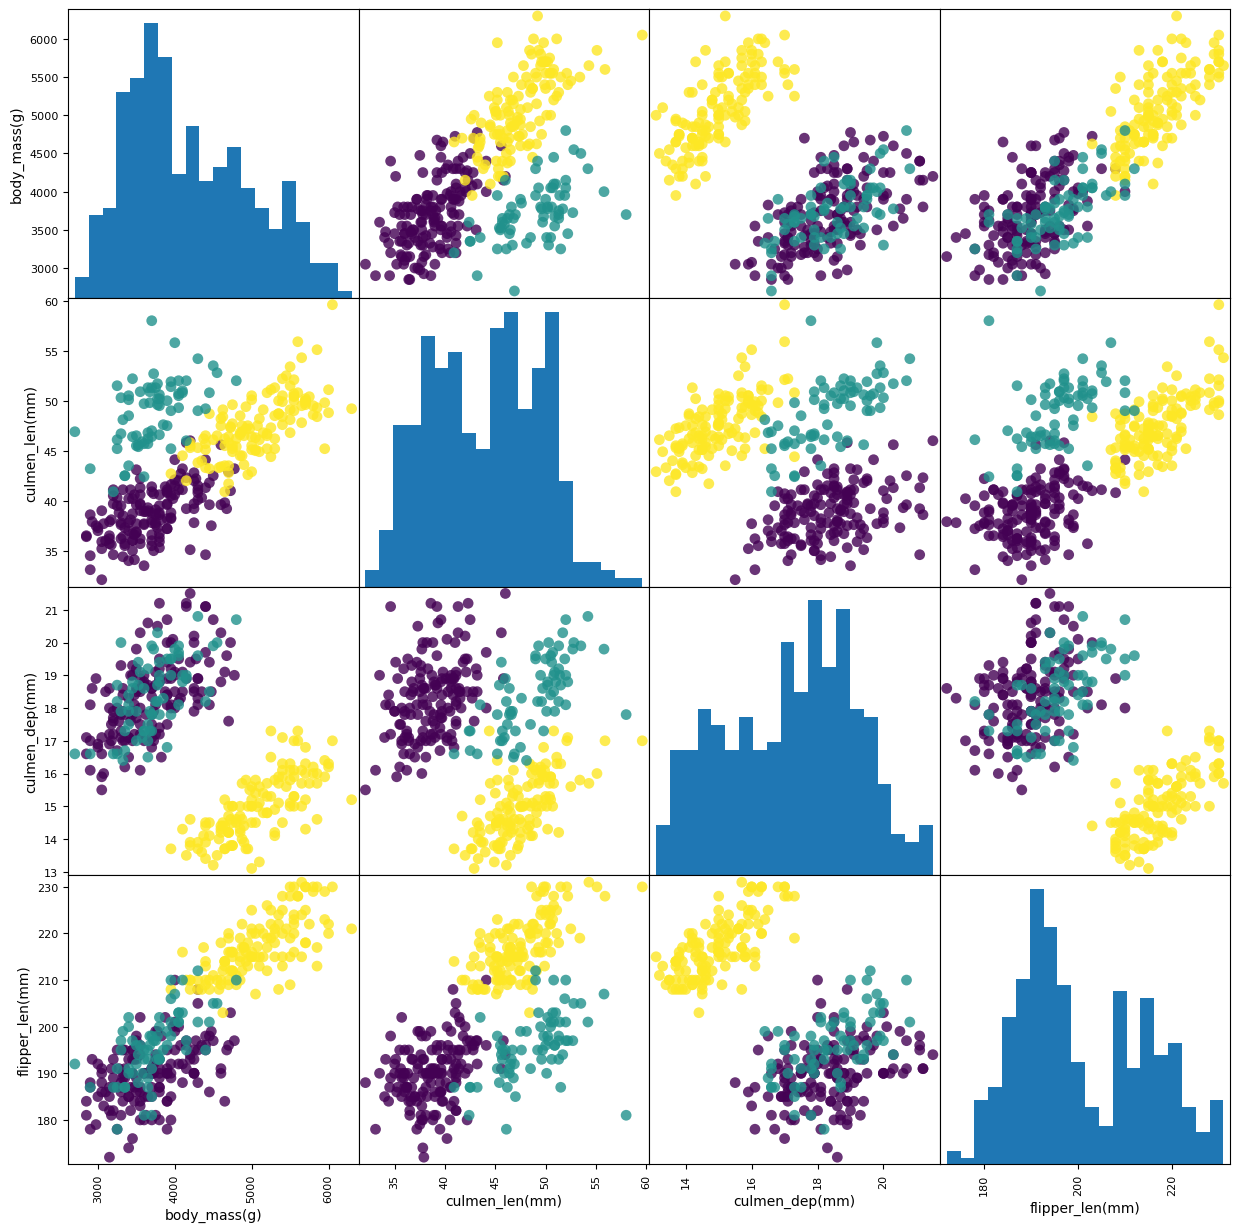

In [37]:
grr = pd.plotting.scatter_matrix(pen.iloc[:,4:8],c=pen["Species"],figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

In [110]:
x = pen.iloc[:,4:8]
y = pen["Species"]

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [128]:
knn_pen = KNeighborsClassifier(n_neighbors=1)

In [129]:
knn_pen.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [130]:
knn_pen.score(x_test,y_test)

c:\Users\shreyankj\Desktop\ML Learning\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8623188405797102